In [81]:
import numpy as np
import nmrglue
import matplotlib.pyplot as plt
import pandas as pd
def analyze_dataset(all_data):
    # Create a DataFrame with real, imaginary, and time values
    time = np.linspace(0, AQ, len(all_data))
    df = pd.DataFrame({
        "Time": time,
        "Real": all_data.real,
        "Imaginary": all_data.imag
    })
    all_data=nmrglue.proc_base.ps(all_data, p0+90, p1) #Why is there an extra 90 here? Probably from ph31 convention?
    # Apply exponential apodization
    #apodized_data = nmrglue.proc_base.em(all_data, .0004)
    #*********this function can only take real part and not full complex part. Do we want to edit this way?

    ls_and_apodized_data = nmrglue.proc_base.ls(all_data, 63)
    # Plot the results
    
    spectrum = nmrglue.proc_base.fft(ls_and_apodized_data) 
    n = len(all_data.real)
    freq = np.linspace(-SWH / 2+center, SWH / 2+center, n) #I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.
    return (freq,np.real(spectrum), np.imag(spectrum))
    

In [82]:
# Important Acqus Parameters
AQ=1.6# Acquistion time (s)
SWH=2000 #Spectral Width [Hz]
SF=202.4765750 #Spectrometer frequency [Mhz]
SFO1=202.4751988 #Transmitter frequency [Mhz]
SFO2=202.4744409
p0=-40
p1=0
center=-(SF-SFO1)*10**6
center2=-(SF-SFO2)*10**6
plot_width=20

In [83]:
# Suppose you have 14 file paths:
# Generate file paths dynamically
file_paths = [
    fr"C:\Users\donny\Desktop\desktop_files\Brown\All_data\Final_Organized_MIT_DATA\2024_12_23-24\0010CNP_ns4_16\{i}"
    for i in range(16, 29+1)  # Adjust the range as needed
]

#ns4
#.04W


# Initialize a list to store results
all_results_ns4 = []

for path in file_paths:
    # Read the data
    all_data = nmrglue.bruker.read(path)[1]

    # Unpack arrays
    array0, array1, array2, _ = all_data

    # Process each array
    rho_0 = analyze_dataset(array0)
    rho_1 = analyze_dataset(array1)
    rho_2 = analyze_dataset(array2)

    # Combine processed arrays: real and imaginary parts
    x = rho_0[0]  # Assuming x is consistent for all files
    real_data = rho_0[1] + rho_1[1] + rho_2[1]
    imag_data = rho_0[2] + rho_1[2] + rho_2[2]

    # Ensure all arrays have the same length (e.g., 3200)
    assert len(x) == len(real_data) == len(imag_data) == 3200, "Array dimensions mismatch!"

    all_results_ns4.append([x, rho_0[1], rho_1[1], rho_2[1], rho_0[2], rho_1[2], rho_2[2], real_data, imag_data])
    #all_results.append([x, real_data, imag_data]) Jiwoo's notation, Shape will be (14, 3, 3200)

# Convert all_results into a NumPy array
results_array_ns4 = np.array(all_results_ns4)  


In [84]:
# Suppose you have 14 file paths:
# Generate file paths dynamically
file_paths = [
    fr"C:\Users\donny\Desktop\desktop_files\Brown\All_data\Final_Organized_MIT_DATA\2024_12_23-24\0010CNP_ns1_30\{i}"
    for i in range(30, 43+1)  # Adjust the range as needed
]

#ns1
#.04W

# Initialize a list to store results
all_results_ns1 = []

for path in file_paths:
    # Read the data
    all_data = nmrglue.bruker.read(path)[1]

    # Unpack arrays
    array0, array1, array2, _ = all_data

    # Process each array
    rho_0 = analyze_dataset(array0)
    rho_1 = analyze_dataset(array1)
    rho_2 = analyze_dataset(array2)

    # Combine processed arrays: real and imaginary parts
    x = rho_0[0]  # Assuming x is consistent for all files
    real_data = rho_0[1] + rho_1[1] + rho_2[1]
    imag_data = rho_0[2] + rho_1[2] + rho_2[2]

    # Ensure all arrays have the same length (e.g., 3200)
    assert len(x) == len(real_data) == len(imag_data) == 3200, "Array dimensions mismatch!"

    all_results_ns1.append([x, rho_0[1], rho_1[1], rho_2[1], rho_0[2], rho_1[2], rho_2[2], real_data, imag_data])
    #all_results.append([x, real_data, imag_data]) Jiwoo's notation, Shape will be (14, 3, 3200)

# Convert all_results into a NumPy array
results_array_ns1 = np.array(all_results_ns1)  


In [102]:
# Generate file paths dynamically
file_paths = [
    fr"C:\Users\donny\Desktop\desktop_files\Brown\All_data\Final_Organized_MIT_DATA\2024_12_17-18\0010CNP_ns1_316\{i}"
    for i in range(316, 329+1)  # Adjust the range as needed
]

#ns1
#0.41257W

# Initialize a list to store results
all_results_ns1_p41257 = []

for path in file_paths:
    # Read the data
    all_data = nmrglue.bruker.read(path)[1]

    # Unpack arrays
    array0, array1, array2, _ = all_data

    # Process each array
    rho_0 = analyze_dataset(array0)
    rho_1 = analyze_dataset(array1)
    rho_2 = analyze_dataset(array2)

    # Combine processed arrays: real and imaginary parts
    x = rho_0[0]  # Assuming x is consistent for all files
    real_data = rho_0[1] + rho_1[1] + rho_2[1]
    imag_data = rho_0[2] + rho_1[2] + rho_2[2]

    # Ensure all arrays have the same length (e.g., 3200)
    assert len(x) == len(real_data) == len(imag_data) == 3200, "Array dimensions mismatch!"

    all_results_ns1_p41257.append([x, rho_0[1], rho_1[1], rho_2[1], rho_0[2], rho_1[2], rho_2[2], real_data, imag_data])
    #all_results.append([x, real_data, imag_data]) Jiwoo's notation, Shape will be (14, 3, 3200)

# Convert all_results into a NumPy array
results_array_ns1_p41257 = np.array(all_results_ns1_p41257)  


In [ ]:
 Suppose you have 14 file paths:
file_paths = [
    fr"C:\Users\donny\Desktop\desktop_files\Brown\All_data\Final_Organized_MIT_DATA\2024_12_23-24\NOT_TOMOGRAPHY\ns4_analyze_phase_addition_p04Wdecoupler\{i}"
    for i in range(119, 174+1)  # Adjust the range as needed
]

#Starting with scan 119
#.04W decoupler


# Initialize a list to store results
all_results = []

for path in file_paths:
    # Read the data
    all_data = nmrglue.bruker.read(path)[1]

    # Unpack arrays
    array0, array1, array2, _ = all_data

    # Process each array
    rho_0 = analyze_dataset(array0)
    rho_1 = analyze_dataset(array1)
    rho_2 = analyze_dataset(array2)

    # Combine processed arrays: real and imaginary parts
    x = rho_0[0]  # Assuming x is consistent for all files
    real_data = rho_0[1] + rho_1[1] + rho_2[1]
    imag_data = rho_0[2] + rho_1[2] + rho_2[2]

    # Ensure all arrays have the same length (e.g., 3200)
    assert len(x) == len(real_data) == len(imag_data) == 3200, "Array dimensions mismatch!"

    all_results.append([x, rho_0[1], rho_1[1], rho_2[1], rho_0[2], rho_1[2], rho_2[2], real_data, imag_data])
    #all_results.append([x, real_data, imag_data]) Jiwoo's notation, Shape will be (14, 3, 3200)

# Convert all_results into a NumPy array
results_array = np.array(all_results)  


In [ ]:
results_array.shape

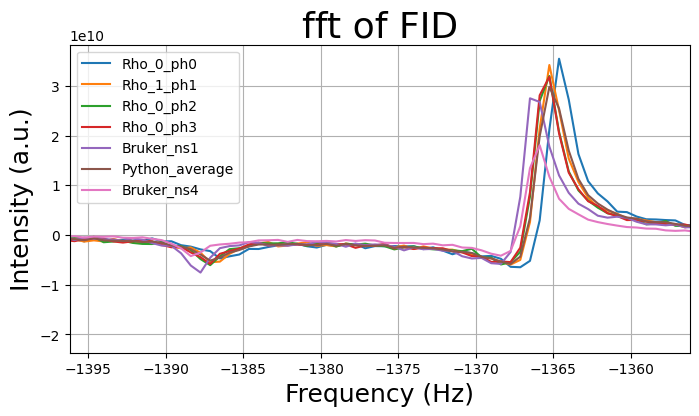

In [86]:
freq_axis=results_array[0][0]

plt.figure(figsize=(8, 4))
plt.plot(freq_axis, results_array[0][1], label="Rho_0_ph0") 
plt.plot(freq_axis, results_array[1][1], label="Rho_1_ph1") 
plt.plot(freq_axis, results_array[2][1], label="Rho_0_ph2") 
plt.plot(freq_axis, results_array[3][1], label="Rho_0_ph3")
plt.plot(freq_axis, results_array_ns1[0][1], label="Bruker_ns1")
plt.plot(freq_axis, (results_array[0][1]+results_array[1][1]+results_array[2][1]+results_array[3][1])/4, label="Python_average") 
plt.plot(freq_axis, results_array_ns4[0][1]/4, label="Bruker_ns4")

plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()


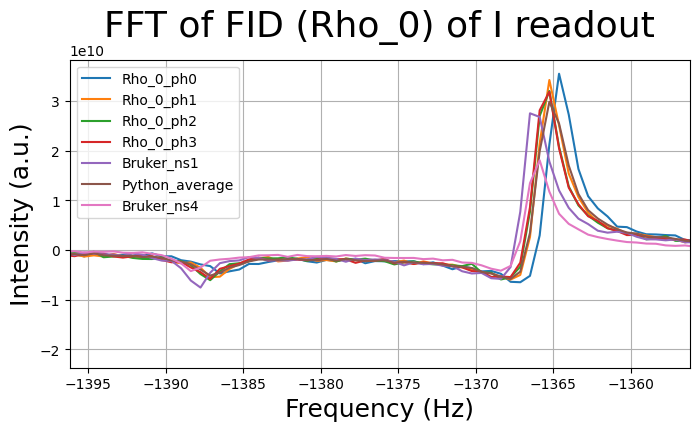

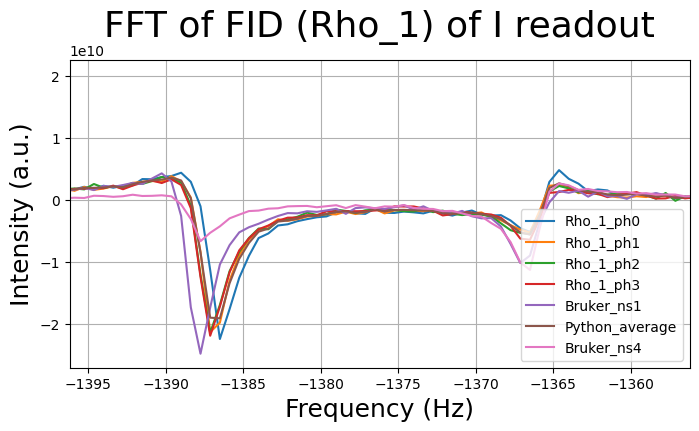

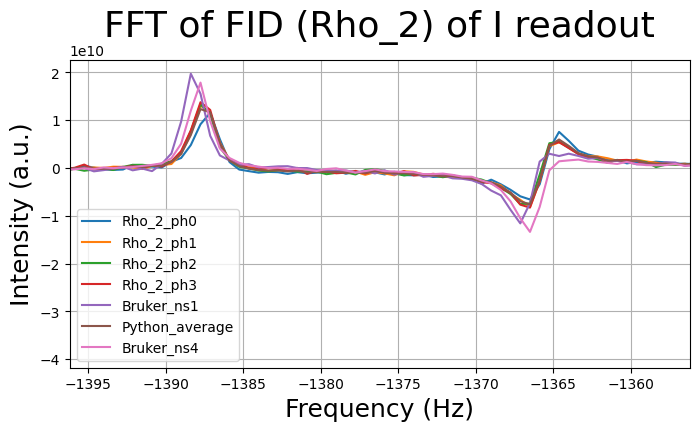

In [87]:
for i in range(1, 4):  # Loop over i from 1 to 6
    plt.figure(figsize=(8, 4))
    
    # Plotting various results
    plt.plot(freq_axis, results_array[0][i], label=f"Rho_{i-1}_ph0")
    plt.plot(freq_axis, results_array[1][i], label=f"Rho_{i-1}_ph1")
    plt.plot(freq_axis, results_array[2][i], label=f"Rho_{i-1}_ph2")
    plt.plot(freq_axis, results_array[3][i], label=f"Rho_{i-1}_ph3")
    plt.plot(freq_axis, results_array_ns1[0][i], label="Bruker_ns1")
    plt.plot(freq_axis, 
             (results_array[0][i] + results_array[1][i] + results_array[2][i] + results_array[3][i]) / 4, 
             label="Python_average")
    plt.plot(freq_axis, results_array_ns4[0][i] / 4, label="Bruker_ns4")
    
    # Add labels, title, and formatting
    plt.xlabel("Frequency (Hz)", fontsize=18)
    plt.ylabel("Intensity (a.u.)", fontsize=18)
    plt.title(f"FFT of FID (Rho_{i-1}) of I readout", fontsize=26)
    plt.legend()
    plt.grid(True)
    
    # Set x-axis limits
    plt.xlim(center - plot_width, center + plot_width)
    
    # Uncomment this if you want to invert the x-axis
    # plt.gca().invert_xaxis()
    
    # Show the plot
    plt.show()


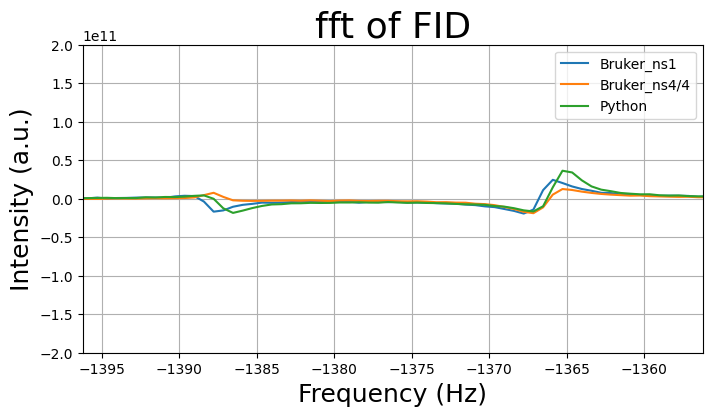

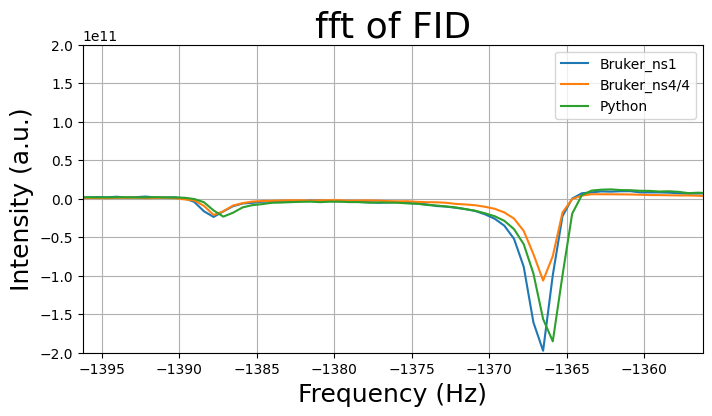

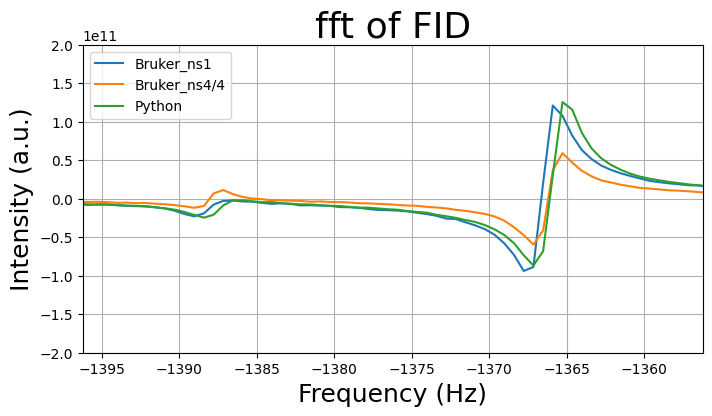

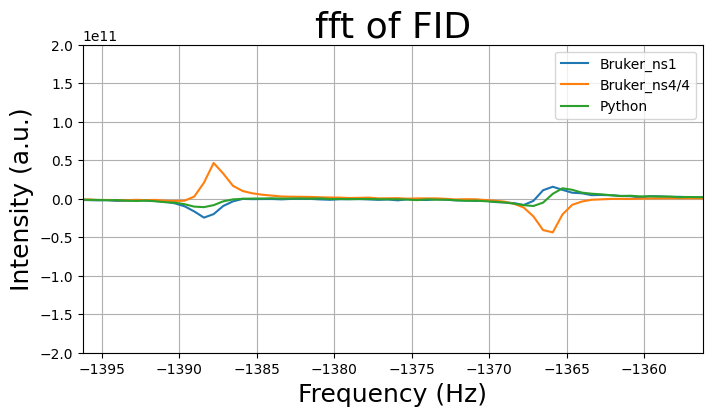

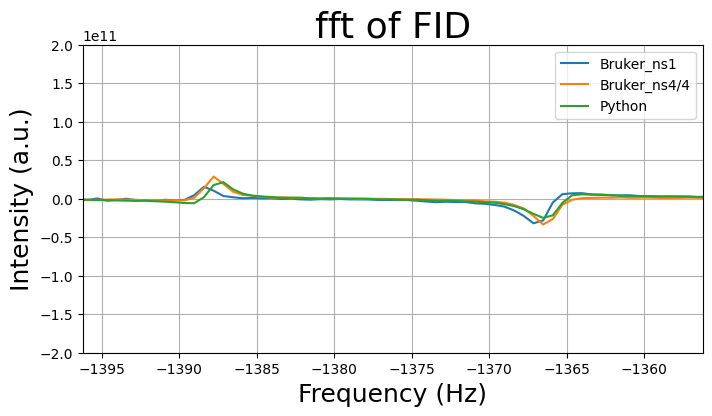

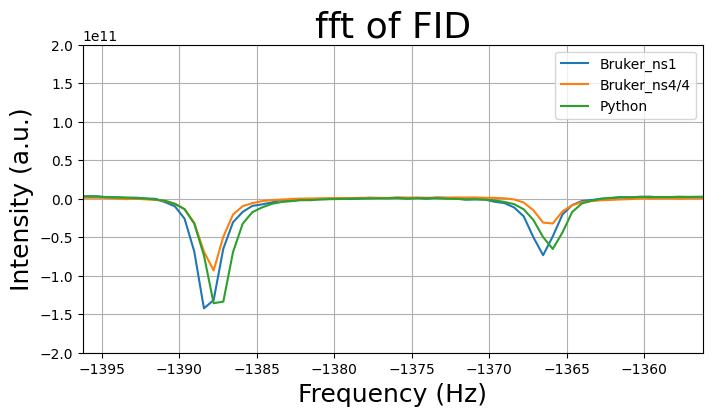

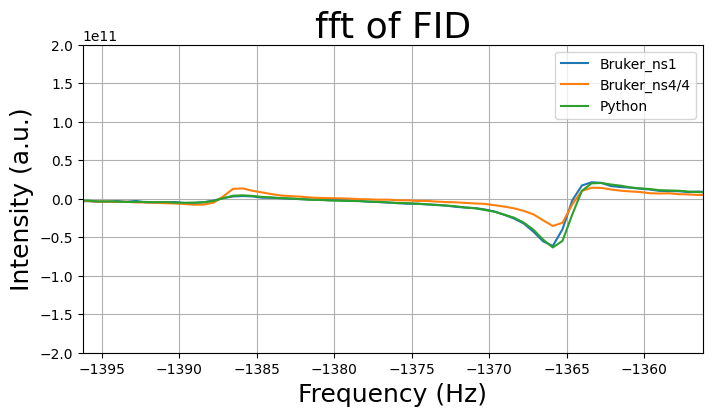

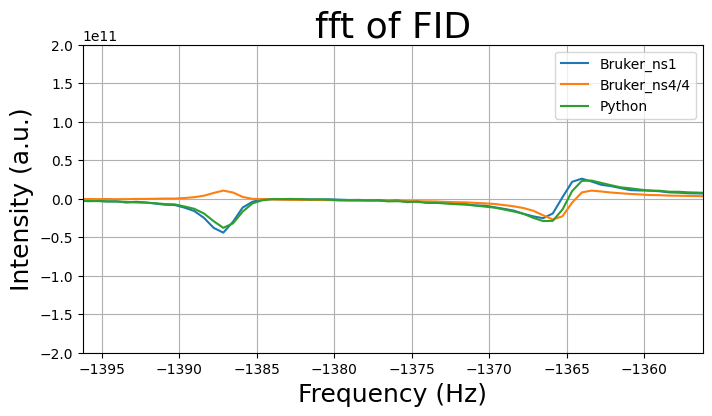

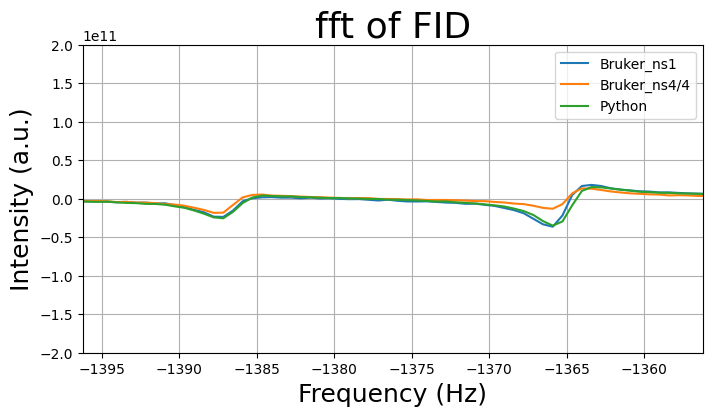

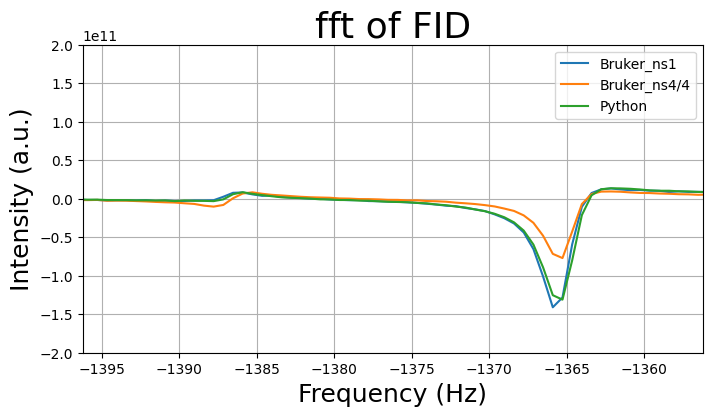

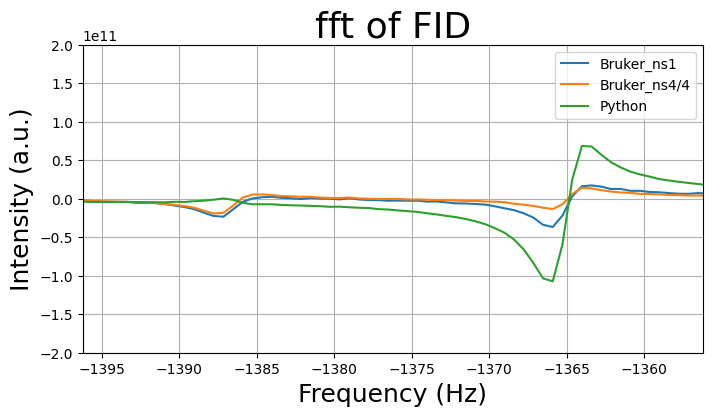

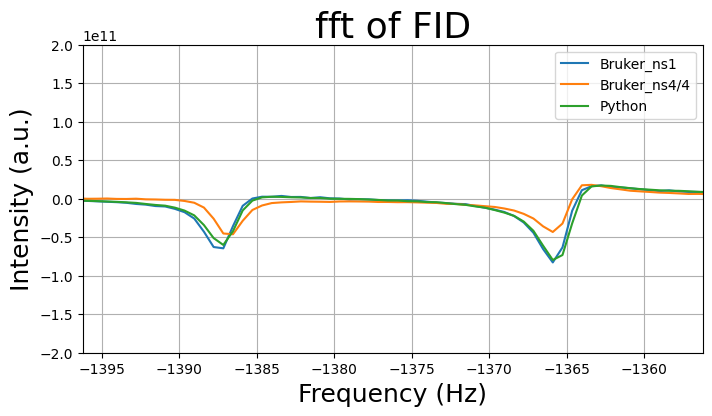

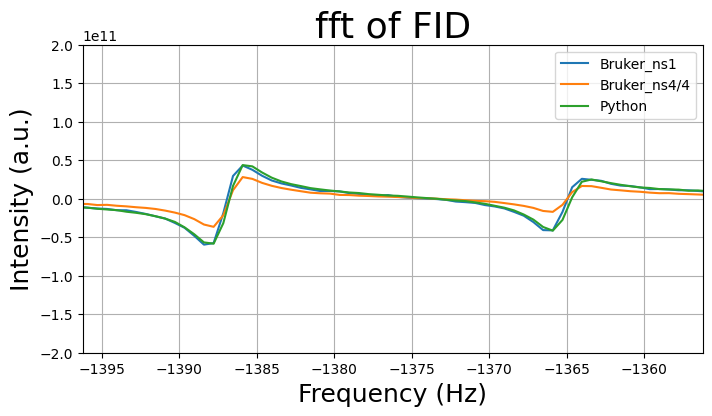

In [88]:
#Next lets graph Bruker ns1, Bruker ns4, and Python average for the 7 real readouts on Q1

for n in range(0, 6):  #
    
    average_result = sum(
        (results_array[0+4*n][i] + results_array[1+4*n][i] + results_array[2+4*n][i] + results_array[3+4*n][i]) / 4
        for i in range(1, 4)
    )
    
    plt.figure(figsize=(8, 4))
    
    plt.plot(freq_axis, results_array_ns1[n][7], label="Bruker_ns1")
    plt.plot(freq_axis, results_array_ns4[n][7]/4, label="Bruker_ns4/4")
    
    plt.plot(freq_axis, average_result, label="Python")
    
    
    plt.xlabel("Frequency (Hz)", fontsize=18)
    plt.ylabel("Intensity (a.u.)", fontsize=18)
    plt.title("fft of FID", fontsize=26)
    plt.legend()
    plt.grid(True)
    #plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
    plt.xlim(center - plot_width, center + plot_width)
    plt.ylim(-2e11, 2e11)
    #plt.gca().invert_xaxis()
    plt.show()
    
    
for n in range(7, 14):  #
    
    average_result = sum(
        (results_array[0+4*n][i] + results_array[1+4*n][i] + results_array[2+4*n][i] + results_array[3+4*n][i]) / 4
        for i in range(1, 4)
    )
    
    plt.figure(figsize=(8, 4))
    
    plt.plot(freq_axis, results_array_ns1[n][7], label="Bruker_ns1")
    plt.plot(freq_axis, results_array_ns4[n][7]/4, label="Bruker_ns4/4")
    
    plt.plot(freq_axis, average_result, label="Python")
    
    
    plt.xlabel("Frequency (Hz)", fontsize=18)
    plt.ylabel("Intensity (a.u.)", fontsize=18)
    plt.title("fft of FID", fontsize=26)
    plt.legend()
    plt.grid(True)
    #plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
    plt.xlim(center - plot_width, center + plot_width)
    plt.ylim(-2e11, 2e11)
    #plt.gca().invert_xaxis()
    plt.show()
    
#Q2 X AXIS SEEMS TO BE OFF

In [89]:
#now lets group as (14,3,3000)

output = []
for n in range(0, 14):  #
    
    average_result1 = (results_array[0+4*n][1] + results_array[1+4*n][1] + results_array[2+4*n][1] + results_array[3+4*n][1]) / 4
    average_result2 = (results_array[0+4*n][2] + results_array[1+4*n][2] + results_array[2+4*n][2] + results_array[3+4*n][2]) / 4
    average_result3 = (results_array[0+4*n][3] + results_array[1+4*n][3] + results_array[2+4*n][3] + results_array[3+4*n][3]) / 4
    
    output.append([average_result1, average_result2, average_result3])
    #all_results.append([x, real_data, imag_data]) Jiwoo's notation, Shape will be (14, 3, 3200)

# Convert all_results into a NumPy array
ns4_array= np.array(output)  
    

In [90]:
ns4_array.shape

(14, 3, 3200)

In [91]:
output_p8w = []
for n in range(0, 1):  #
    
    average_result1_p8w = (results_array_p8w[0+4*n][1] + results_array_p8w[1+4*n][1] + results_array_p8w[2+4*n][1] + results_array_p8w[3+4*n][1]) / 4
    average_result2_p8w = (results_array_p8w[0+4*n][2] + results_array_p8w[1+4*n][2] + results_array_p8w[2+4*n][2] + results_array_p8w[3+4*n][2]) / 4
    average_result3_p8w = (results_array_p8w[0+4*n][3] + results_array_p8w[1+4*n][3] + results_array_p8w[2+4*n][3] + results_array_p8w[3+4*n][3]) / 4
    
    output_p8w.append([average_result1_p8w, average_result2_p8w, average_result3_p8w])
    #all_results.append([x, real_data, imag_data]) Jiwoo's notation, Shape will be (14, 3, 3200)

# Convert all_results into a NumPy array
ns4_array_p8w= np.array(output_p8w)  

In [92]:
ns4_array_p8w.shape

(1, 3, 3200)

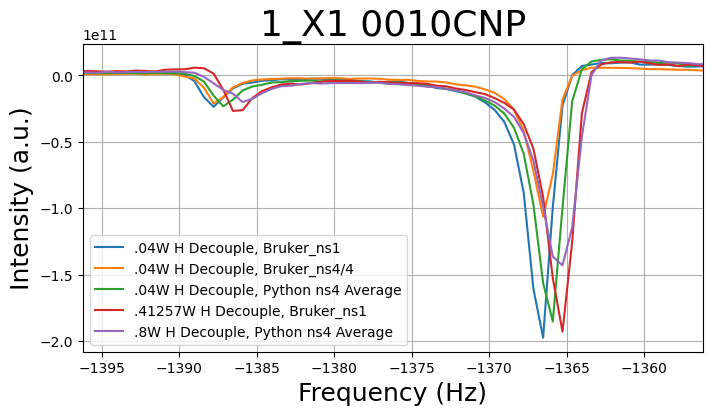

In [107]:
freq_axis=results_array[0][0]
j=1
plt.figure(figsize=(8, 4))
plt.plot(freq_axis, results_array_ns1[1][7], label=".04W H Decouple, Bruker_ns1")
plt.plot(freq_axis, results_array_ns4[1][7]/4, label=".04W H Decouple, Bruker_ns4/4")
plt.plot(freq_axis, ns4_array[j][0]+ns4_array[j][1]+ns4_array[j][2], label=".04W H Decouple, Python ns4 Average") 
plt.plot(freq_axis, all_results_ns1_p41257[1][7], label=".41257W H Decouple, Bruker_ns1") 
plt.plot(freq_axis, ns4_array_p8w[0][0]+ns4_array_p8w[0][1]+ns4_array_p8w[0][2], label=".8W H Decouple, Python ns4 Average") 



    
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("1_X1 0010CNP", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()